# **Analysis of School Status Changes During COVID-19: Economic and Demographic Influences Across Countries**

## **1. Introduction**

### 1.1. Purpose
The purpose of this analysis is to examine the school status changes (academic break, closed due to COVID-19, fully open, partially open) across various countries during the COVID-19 pandemic. The goal is to identify similarities or differences in these status changes based on the countries' economic and demographic profiles.

### 1.2 About Dataset
- **Date**: The date when status was recorded.
- **ISO**: Internationally recognized codes that identify countries and their subdivisions.
- **Country**: The name of the country
- **Status**: The school status(academic break, closed due to COVID-19, fully open and partially open)
- **GDP**: The gross domestic product
- **Population**: Total population of each country
- **Human Development Indix (HDI)**: A composite index measuring average achievement in key dimensions of human development.

## **2. Descriptive Analysis**

### 2.1. Descriptive Statistics
The descriptive statistics provide a summary of the central tendency, dispersion, and shape of the dataset’s distribution.

|          | GDP    | Population         | HDI | 
|----------|-----------|----------------------------|---------|
|count	   |   6,240.0	|6,240.0	|6240|
|mean	   |  40,482.9	|380,359,279.1	|0.7|
|std	   |24,249.4	  |527,256,897.3	|0.1
|min	   |2,484.8	|26,638,544.0	|0.5
|25%	   |12,614.1	|68,170,228.0	|0.7
|50%	   |46,663.7	|104,499,458.5	|0.8
|75%	   |53,371.7	|334,914,895.0	|0.8
|max	   |81,695.2	|1,430,000,000.0	|0.8    

### 2.2. Average Metrics by Country Status
The average GDP, Population, and HDI for each status category.

|Status	|GDP	|Population	|HDI|
|-------|-------|-----------|----|
|Fully open	|41,113.67	|285,717,514.84	|0.78|
|Partially open|	43,987.18|	455,607,478.09	|0.70|
|Closed due to COVID-19	|25,485.12	|482,460,448.62	|0.67|
|Academic break	|44,090.07	|332,721,385.57	|0.75|

## **3. ANOVA Analysis**

### 3.1. ANOVA Statistics
ANOVA tests was performed to determine if there are significant differences in GDP, Population, and HDI among the clusters.


##### **ANOVA For GDP**
|F-statistic|p-value|
|-------|-------|
|19,019	|P < .001|

##### **ANOVA For Population**
|F-statistic|p-value|
|-------|-------|
|937,053	|P < .001|

##### **ANOVA For HDI**
|F-statistic|p-value|
|-------|-------|
|8,418	|P < .001|

## **4. Scatter Plot of GDP vs HDI by Cluster**
A scatter plot was created to visualize the relationship between GDP and HDI across different clusters.

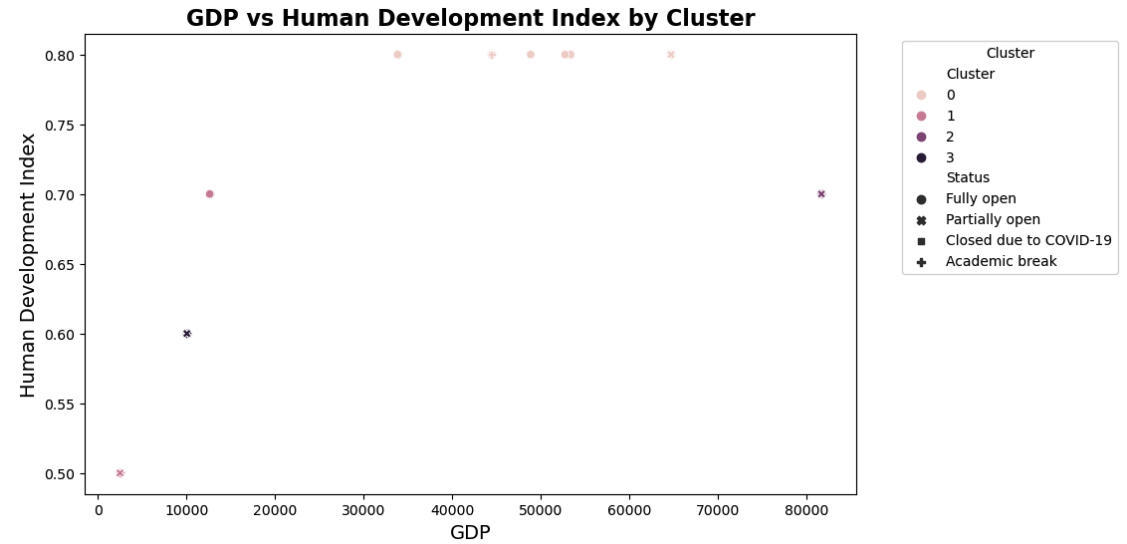

## **5. Pair Plot of GDP, Population, and HDI by Cluster**
The Pair Plot visualize the relationship between GDP, Population and HDI across different clusters.

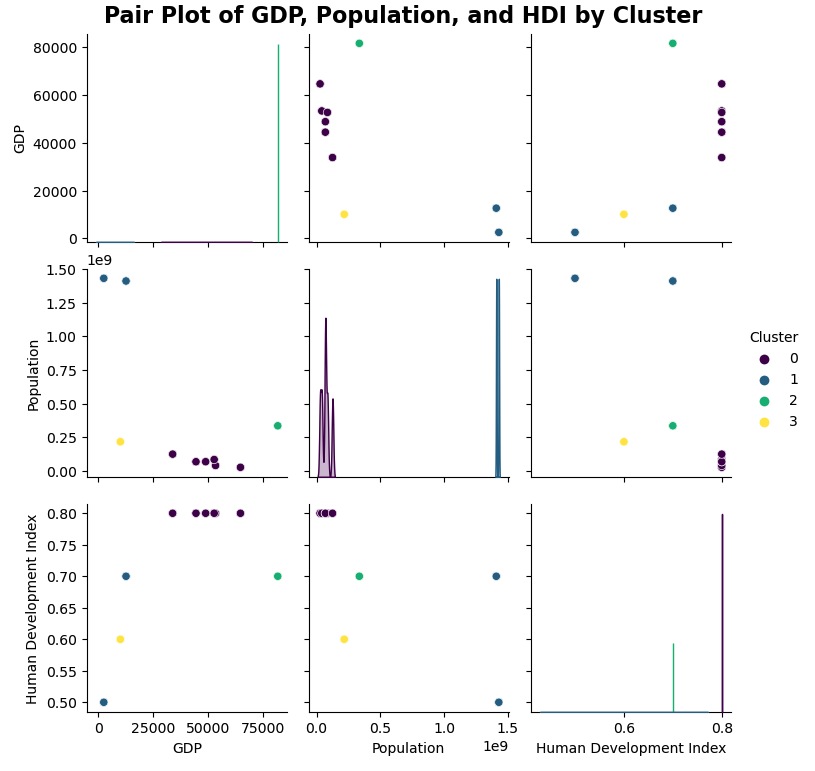

## **6. Conclusion**

### 6.1. Summary of Findings
While the majority of countries have a medium to high Human Development Index (HDI), significant **economic disparities** exist among them. A country polulation size can impact how countries manage school status changes, but isn't as influential as economic and human development factors. Countries with higher GDP tend to keep schools open (fully or partially) or put them on academic breaks rather than closing them completely. This suggests that wealthier countries may have better resources to manage the pandemic's impact on education. 

## **Python Code**

### 1. Descriptive Analysis

In [ ]:
import pandas as pd

file_path = '/Users/nahoemipablo/Downloads/Comparative Analysis Dataset.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

df.columns = df.columns.str.strip()

descriptive_stats = df.describe().round(1)

def plot_table(data, title):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(10, 4))  
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=data.values, colLabels=data.columns, rowLabels=data.index, cellLoc='center', loc='center')
    plt.title(title, fontweight='bold', fontsize=16)
    plt.show()

print("\n\033[1mDescriptive Statistics:\033[0m\n")
plot_table(descriptive_stats, "Descriptive Statistics")


### 2. Average Metrics by Country Status

In [ ]:
numeric_cols = ['GDP', 'Population', 'Human Development Index']
grouped_stats = df.groupby('Status')[numeric_cols].mean().round(2)

print("\n\033[1mAverage Metrics by Country Status:\033[0m\n")
plot_table(grouped_stats, "Average Metrics by Country Status")

### 3. Clustering Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_cols])

optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

### 4. ANOVA Analysis

In [ ]:
import scipy.stats as stats

print("\n\033[1m\033[4m\033[2mANOVA Analysis\033[0m\n")

anova_gdp = stats.f_oneway(*[df[df['Cluster'] == cluster]['GDP'] for cluster in df['Cluster'].unique()])
print(f"\n   ANOVA results for GDP:       F={anova_gdp.statistic:^6.2f}    p={anova_gdp.pvalue:^6.2e}")

anova_population = stats.f_oneway(*[df[df['Cluster'] == cluster]['Population'] for cluster in df['Cluster'].unique()])
print(f"   ANOVA results for Population: F={anova_population.statistic:^6.2f} p={anova_population.pvalue:^6.2e}")

anova_hdi = stats.f_oneway(*[df[df['Cluster'] == cluster]['Human Development Index'] for cluster in df['Cluster'].unique()])
print(f"   ANOVA results for HDI:        F={anova_hdi.statistic:^6.2f}    p={anova_hdi.pvalue:^6.2e}")

### 5. Scatter Plot of GDP vs HDI by Cluster

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP', y='Human Development Index', hue='Cluster', style='Status')
plt.title('GDP vs Human Development Index by Cluster', fontweight='bold', fontsize=16)
plt.xlabel('GDP', fontsize=14)
plt.ylabel('Human Development Index', fontsize=14)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 6. Pair Plot of GDP, Population and HDI by Cluster

In [ ]:
sns.pairplot(df, vars=['GDP', 'Population', 'Human Development Index'], hue='Cluster', palette='viridis')
plt.suptitle('Pair Plot of GDP, Population, and HDI by Cluster', fontsize=16, fontweight='bold', y=1.02)
plt.show()